In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential

In [2]:
df = pd.read_csv("car_sales_data.csv") #loading file

### Linear Regression w year of Manufacture

In [5]:

x = df["Year of manufacture"]      # Extract the input feature

y = df["Price"]                    # Extract the output feature

# The sklearn models expect the input to be in the form of a 2-dimensional array. Convert  and re-shape x to 2 dimensions.
x = x.to_numpy().reshape(-1, 1)


# We can now split the x and y arrays between the train and test sets. 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)

# Confirming the size of the training and testing sets.
print("There are %d data points in the training set." % (len(x_train), ))
print("There are %d data points in the testing set." % (len(x_test), ))


# Create an instance of the StandardScaler class
scale = StandardScaler()

# Fit the standard scaler to the input data in x to find the mean and standard deviation in x, using the training dataset.
scale.fit(x_train)

# Apply the standard scaler transformation to the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

price_linear = LinearRegression()  # Create an instance of the model.

price_linear.fit(x_train_scaled, y_train)  # Fit the model to the training data.

# Get the fit coefficients from the best-fit model.
gradient = price_linear.coef_[0]
intercept = price_linear.intercept_

# Print the coefficients.
print("gradient: ", gradient)
print("intercept: ", intercept)


# Use the trained model to predict the outputs (Price)
price_pred = price_linear.predict(x_test_scaled)


mean_abs = mean_absolute_error(y_test, price_pred) # Calculate the mean absolute error

mean_squared = mean_squared_error(y_test, price_pred)   # Calculate the mean squared error

rms_error = np.sqrt(mean_squared)

R2 = r2_score(y_test, price_pred)    # Calculate the R2 score

# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

There are 40000 data points in the training set.
There are 10000 data points in the testing set.
gradient:  11711.62203633313
intercept:  13854.628699999997
Mean absolute error:  7031.0392086748525
Mean squared error:  132678999.94793083
Root mean squared error:  11518.637069893766
R2:  0.5110865244812856


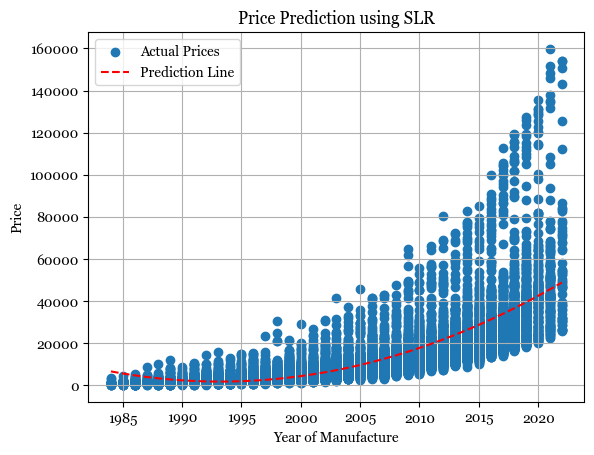

In [10]:

# Scatter plot of actual prices against the input feature
plt.scatter(x_test, y_test,label='Actual Prices')

# Sort the test data to ensure that the plot line is continuous
sorted_indices = np.argsort(x_test[:, 0])
x_test_sorted = x_test[sorted_indices]
price_pred_sorted = price_pred[sorted_indices]

# Plot the predicted prices obtained from the model
plt.plot(x_test_sorted, price_pred_sorted, color='red', linestyle='--', label='Prediction Line')

# Add labels and title
plt.xlabel("Year of Manufacture", fontname='Georgia')
plt.ylabel("Price", fontname='Georgia')
plt.title("Price Prediction using SLR", fontname='Georgia')
plt.legend()
plt.grid(True)
plt.rcParams['font.family'] = 'Georgia'
# Show plot
plt.show()

#### Polynomial Regression w Year of Manufacture

In [11]:
# Extract the input feature
x = df["Year of manufacture"]
# Extract the output feature
y = df["Price"]
# Since we only have a single input feature,
# we need to re-shape x so that it has
# 2 dimensions.
x = x.to_numpy().reshape(-1, 1)
# Split the x and y data between the
# training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)
# Create an instance of the StandardScaler class
scale = StandardScaler()
# Fit the standard scaler to the input data that
# we have in x_train.
scale.fit(x_train)
# Now apply the standard scaler transformation
# to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

from sklearn.preprocessing import PolynomialFeatures
# Create an instance of the PolynomialFeatures class.
# set the degree of the polynomial here degree of 2.

poly = PolynomialFeatures(degree = 2, include_bias = False)
# apply this PolynomialFeatures transformation to the scaled input data from the training set. 
x_poly = poly.fit_transform(x_train_scaled)

# Create an instance of the LinearRegression model.
price_poly = LinearRegression()
# Fit the model to the training data.
price_poly.fit(x_poly, y_train)

# Get the fit coefficients from the best-fit model.
coefficients = price_poly.coef_
intercept = price_poly.intercept_
# Print the coefficients
print("coefficients: ", coefficients)
print("intercept: ", intercept)

# Use the final, trained model to predict the price

x_test_poly = poly.fit_transform(x_test_scaled)

price_pred = price_poly.predict(x_test_poly)
# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, price_pred)
# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, price_pred)
# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)
# Calculate the R2 score
R2 = r2_score(y_test, price_pred)
# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)# Extract the input feature
x = df["Year of manufacture"]
# Extract the output feature
y = df["Price"]
# Since we only have a single input feature,
# we need to re-shape x so that it has
# 2 dimensions.
x = x.to_numpy().reshape(-1, 1)
# Split the x and y data between the
# training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)
# Create an instance of the StandardScaler class
scale = StandardScaler()
# Fit the standard scaler to the input data that
# we have in x_train.
scale.fit(x_train)
# Now apply the standard scaler transformation
# to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)





coefficients:  [12065.80671724  5281.89564916]
intercept:  8572.733050839153
Mean absolute error:  5387.109074986994
Mean squared error:  105993894.20194323
Root mean squared error:  10295.33361295025
R2:  0.6094194015754401


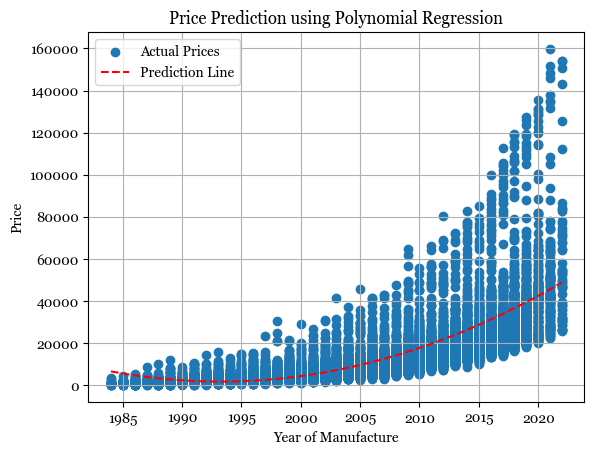

In [13]:
# Scatter plot of actual prices against the input feature
plt.scatter(x_test, y_test,label='Actual Prices')

# Sort the test data to ensure that the plot line is continuous
sorted_indices = np.argsort(x_test[:, 0])
x_test_sorted = x_test[sorted_indices]
price_pred_sorted = price_pred[sorted_indices]

# Plot the predicted prices obtained from the model
plt.plot(x_test_sorted, price_pred_sorted, color='red', linestyle='--', label='Prediction Line')

# Add labels and title
plt.xlabel("Year of Manufacture", fontname='Georgia')
plt.ylabel("Price", fontname='Georgia')
plt.title("Price Prediction using Polynomial Regression", fontname='Georgia')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

### Multiple Linear Regression

In [14]:
# Extract the input features. Note that we do not
# need to re-shape x in this example, because
# it is already a 2-dimensional array.
feature_names = ["Mileage", "Engine size", "Year of manufacture"]
x = df[feature_names]
# Extract the output feature
y = df["Price"]
# Split the x and y data between the
# training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)
# Create an instance of the StandardScaler class
scale = StandardScaler()
# Fit the standard scaler to the input data that
# we have in x_train.
scale.fit(x_train)
# Now apply the standard scaler transformation
# to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)
# Create an instance of the model
price_linear = LinearRegression()
# Fit the model to the training data.
price_linear.fit(x_train_scaled, y_train)
# Get the fit coefficients from the
# best-fit model.
intercept = price_linear.intercept_
coefficients = price_linear.coef_
# Print the coefficients.
print("coefficients: ", coefficients)
print("intercept: ", intercept)
# Use the final, trained model to predict the
# outputs (life expectancies) for countries in

# the testing dataset.
price_pred = price_linear.predict(x_test_scaled)
# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, price_pred)
# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, price_pred)
# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)
# Calculate the R2 score
R2 = r2_score(y_test, price_pred)
# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

coefficients:  [-2720.41736808  6594.02448017  9520.41488938]
intercept:  13854.628699999997
Mean absolute error:  6091.45814165624
Mean squared error:  89158615.76017143
Root mean squared error:  9442.38400829851
R2:  0.671456306417368


Mean Absolute Error (MAE): 6091.45814165629
Mean Squared Error (MSE): 89158615.76017134
Root Mean Squared Error (RMSE): 9442.384008298504
R^2 Score: 0.6714563064173683


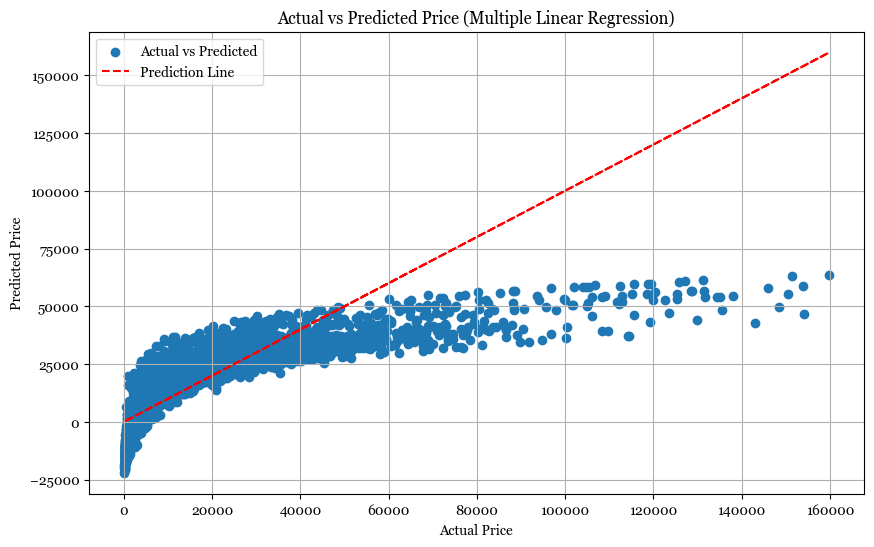

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data

# Define features (X) and target variable (y)
X = df[['Year of manufacture', 'Mileage', 'Engine size']]  # Add more features if needed
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Square root of MSE
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted
plt.scatter(y_test, y_pred, label='Actual vs Predicted')

# Plot the best-fit line
plt.plot(y_test, y_test, color='red', linestyle='--', label='Prediction Line')

plt.xlabel("Actual Price", fontname='Georgia')
plt.ylabel("Predicted Price", fontname='Georgia')
plt.title("Actual vs Predicted Price (Multiple Linear Regression)", fontname='Georgia')
plt.legend()
plt.grid(True)
plt.show()

### SVM w Numerical Features

In [11]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd

# Define numerical features
numerical_features = ['Year of manufacture', 'Mileage', 'Engine size']

# Define preprocessing for numerical features
numerical_transformer = StandardScaler()

# Define SVM model
svm_model = SVR(kernel='rbf')

# Create a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', numerical_transformer),
    ('model', svm_model)
])

# Split data into train and test sets
X = df[numerical_features]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate R^2 Score
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)

Mean Absolute Error (MAE): 6501.5174071809515
Mean Squared Error (MSE): 214971572.11184293
Root Mean Squared Error (RMSE): 14661.908883629134
R^2 Score: 0.20784375447380532


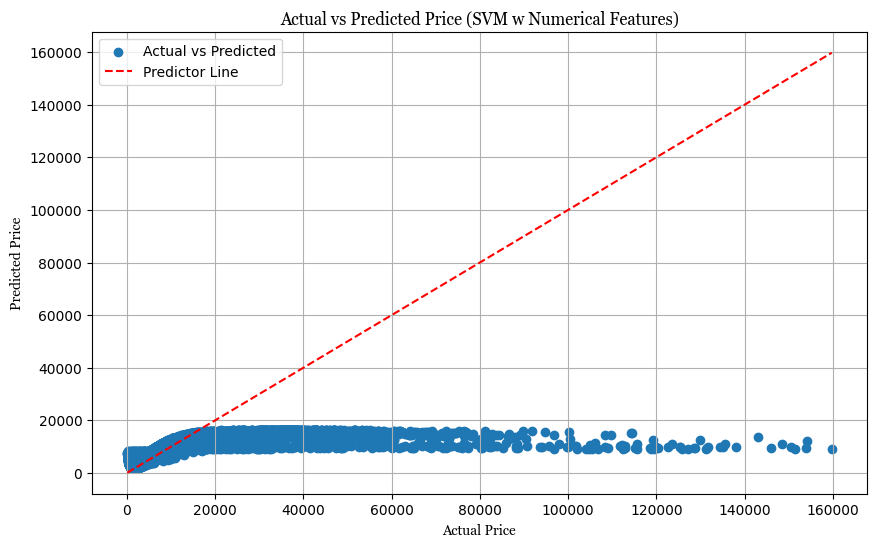

In [13]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted
plt.scatter(y_test, y_pred,label='Actual vs Predicted')
plt.xlabel("Actual Price", fontname='Georgia')
plt.ylabel("Predicted Price", fontname='Georgia')

# Calculate and plot the line passing through data points
x_vals = np.linspace(y_test.min(), y_test.max(), 100)
y_vals = x_vals  # Assuming a line with slope 1 passing through origin
plt.plot(x_vals, y_vals, color='red', linestyle='--', label='Predictor Line')

plt.legend()
plt.title("Actual vs Predicted Price (SVM w Numerical Features)", fontname='Georgia')
plt.grid(True)
plt.show()

### SVM with All Features

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# Define categorical and numerical features
categorical_features = ['Model', 'Manufacturer', 'Fuel type']
numerical_features = ['Year of manufacture', 'Mileage', 'Engine size']

# Define preprocessing for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define SVM model
svm_model = SVR(kernel='rbf')

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', svm_model)])

# Split data into train and test sets
X = df[categorical_features + numerical_features]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)


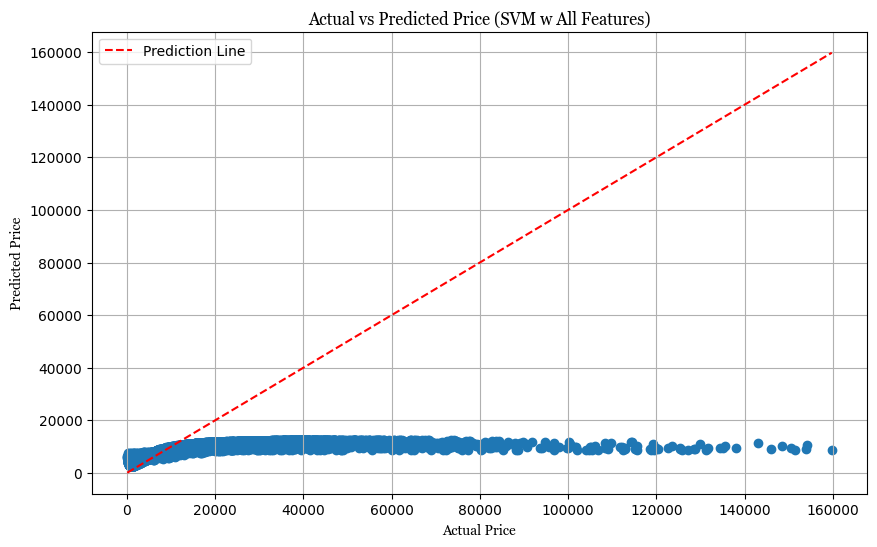

In [15]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price", fontname='Georgia')
plt.ylabel("Predicted Price", fontname='Georgia')

# Add a diagonal line to represent perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Prediction Line')

plt.legend()
plt.title("Actual vs Predicted Price (SVM w All Features)", fontname='Georgia')
plt.grid(True)
plt.show()

In [16]:
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)

Mean Absolute Error (MAE): 7676.572684928301
Mean Squared Error (MSE): 246689505.35411796
Root Mean Squared Error (RMSE): 15706.352388575711
R^2 Score: 0.09096523576446158


In [17]:
from sklearn.model_selection import GridSearchCV

# Define a range of hyperparameters to search through
param_grid = {
    'model__C': [0.1, 1, 10],
    'model__gamma': [0.1, 1, 10],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Get the best model and its score
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

# Predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Best R^2 Score:", best_score)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)

Best R^2 Score: 0.547470958197366
Mean Absolute Error (MAE): 3709.302373325184
Mean Squared Error (MSE): 113660018.42602134
Root Mean Squared Error (RMSE): 10661.145268029197
R^2 Score: 0.5811702329834011


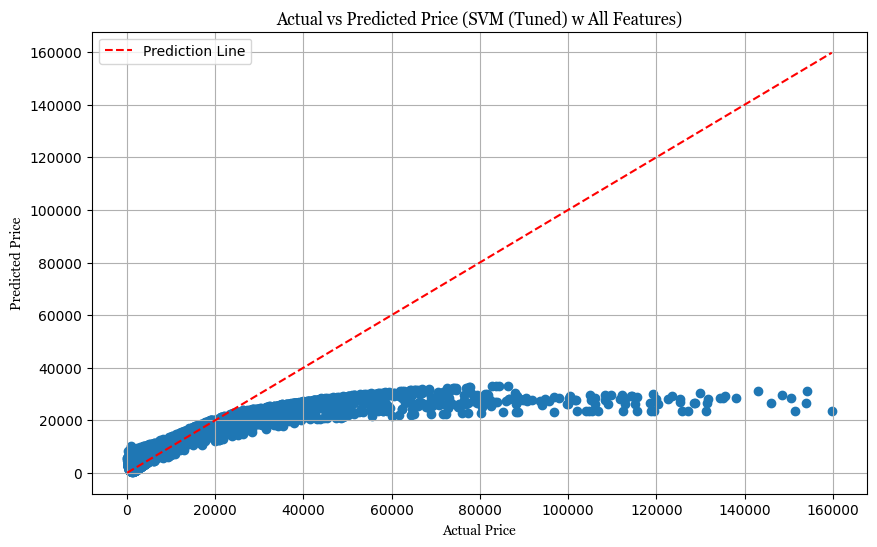

In [19]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price", fontname='Georgia')
plt.ylabel("Predicted Price", fontname='Georgia')

# Add a diagonal line to represent perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Prediction Line')

plt.legend()
plt.title("Actual vs Predicted Price (SVM (Tuned) w All Features)", fontname='Georgia')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Split data into features and target variable
X = df[numerical_features]
y = df['Price']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted
plt.scatter(y_test, y_pred, label='Actual vs Predicted')
plt.xlabel("Actual Price", fontname='Georgia')
plt.ylabel("Predicted Price", fontname='Georgia')

# Add a straight line representing perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Prediction Line')

plt.legend()
plt.title("Actual vs Predicted Price (Logistic Regression)", fontname='Georgia')
plt.grid(True)
plt.show()